# DeepDream in Tensorflow 2.0
### by Timothy Nguyen

This is a demo of the Tensorflow 2.0 implementation of Google's DeepDream that I put together. You can play around with it by loading your own images, selecting different layers to dream from, and even selecting a different pretrained model altogether. Enjoy!

## Dependencies

In [1]:
from deepdream import dream

from tensorflow.keras.applications import inception_v3
import tensorflow as tf

from IPython.display import clear_output
from matplotlib import pyplot as plt

## Constants

Set your parameters below!

In [2]:
# enter the path to the picture you'd like to dream upon below
image_path = '../img/notre_dame.jpg'


# if you'd like to save your dreamed picture, replace the file path below; otherwise, set it to None
output_path = '../img/dreamed/dreamed_notre_dame.jpg'


# These are the names of the layers for which we try to maximize activation.
layer_contributions = {
    'mixed3': .5,
    'mixed4': 1.5,
    'mixed5': 3.,
    'mixed6': 2.
}

## Loading Pretrained Model

Here, we load the InceptionV3 model with ImageNet weights, but you can load any pretrained model you like. Just be sure to change the layer names in `layer_contributions` in the above cell.

In [3]:
# Build the InceptionV3 network with our placeholder.
# The model will be loaded with pre-trained ImageNet weights.
model = inception_v3.InceptionV3(weights='imagenet', include_top=False)

# We'll maximize the activations of these layers
layers = [model.get_layer(name).output for name in layer_contributions.keys()]

# Create our feature extraction model
dreamer = tf.keras.Model(inputs=model.input, outputs=layers)

print('Model loaded.')

Model loaded.


## Dream

Have fun!

In [4]:
dreamed_image = dream(image_path, 
      model=dreamer, 
      layer_contributions=layer_contributions,
      output_path=output_path,
      step=0.1,
      iterations=15,
      octaves=4)

/Users/timmy/anaconda3/envs/tf2/lib/python3.7/site-packages/scipy/ndimage/interpolation.py:605: UserWarning: From scipy 0.13.0, the output shape of zoom() is calculated with round() instead of int() - for these inputs the size of the returned array has changed.
  "the returned array has changed.", UserWarning)


Failed to save dreamed image.


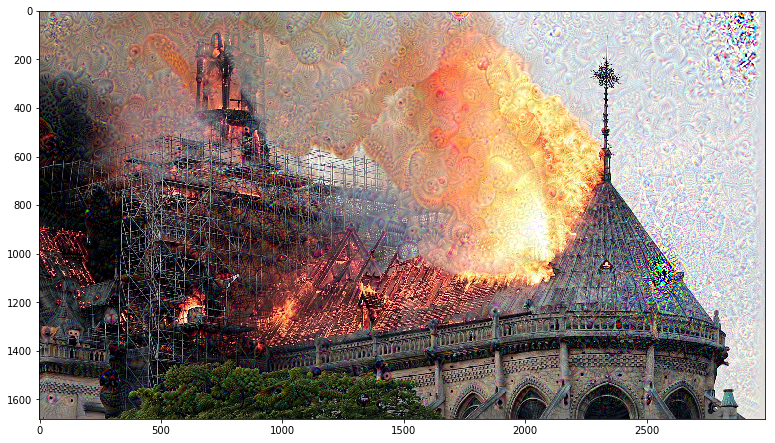

In [5]:
plt.figure(figsize = (13,13))
plt.imshow(dreamed_image)